to set up anaconda environtment
conda create -n test tensorflow keras matplotlib 
then install spyder jupyter
then pip install tf-keras-vis 

In [3]:
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

model location of *.h5 file:  '/home/craig/Documents/YOLO-3-OpenCV/yolo-coco-data/model_data/yolov3.h5'
Load the model as y3, this is unaltered model from darknet weights, coverted to h5 via script, set compile to false

In [4]:
pth='/home/craig/Documents/YOLO-3-OpenCV/yolo-coco-data/model_data/yolov3.h5'
y3=tf.keras.models.load_model(pth,compile=False)

2022-05-12 13:48:24.191867: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-12 13:48:24.192047: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-12 13:48:24.192790: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Inspect the model to see the number of layers, etc.

In [5]:
y3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 128         conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

Examine a layer,printing the weights of the convolutions within that layer

In [6]:
layer_1=y3.get_layer(name='conv2d')
print(layer_1.weights)


[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[-7.39838630e-02, -1.65614009e-01,  9.20041054e-02,
          -5.13450623e-01, -4.36195046e-01,  1.45019054e-01,
           2.15146616e-01, -2.96055200e-03,  5.83840430e-01,
          -4.99872267e-02, -5.53662241e-01,  4.68539089e-01,
          -8.97575021e-02, -2.86801457e-01, -1.79271311e-01,
           3.54868844e-02, -4.21470016e-01, -2.59975731e-01,
           7.50478879e-02,  4.73945290e-01,  7.13113397e-02,
          -1.73525531e-02, -1.47152469e-01,  5.20002127e-01,
          -8.38096440e-02,  1.81173980e-01, -1.76341444e-01,
          -1.55812595e-02,  1.73902377e-01, -3.42300564e-01,
          -3.37531418e-02, -3.87799591e-01],
         [-4.35802005e-02, -1.81117013e-01,  1.54045403e-01,
          -3.68545353e-01,  2.18335949e-02, -5.51717952e-02,
          -5.55012465e-01, -1.35637879e-01,  2.57710397e-01,
          -1.16320714e-01,  3.88486475e-01,  8.84489343e-02,
          -2.07768977e-01, 

In [14]:
y3.inputs

[<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>]

In [56]:
from tensorflow import keras
model_location='/home/craig/Documents/YOLO-3-OpenCV/yolo3_tf/yolov3_model'
yolo3_model=keras.models.load_model(model_location)

In [57]:
yolo3_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
tf.math.truediv_6 (TFOpLambda)  (None, 416, 416, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv_0 (Conv2D)                 (None, 416, 416, 32) 864         tf.math.truediv_6[0][0]          
__________________________________________________________________________________________________
bnorm_0 (BatchNormalization)    (None, 416, 416, 32) 128         conv_0[0][0]                     
____________________________________________________________________________________________

Finding the input which maximizes the activation of a layer:
1. Create a function that takes a model and layer name as arguments, and returns a new model, which has input the same as the model input, and output which is a linear activation of the targeted layer.  This will be used as part of the maximization
2. 

In [58]:
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D
from tf_keras_vis.activation_maximization.regularizers import TotalVariation2D, Norm
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tensorflow.keras.applications import VGG16

In [65]:
activation_maximization = ActivationMaximization(yolo3_model,
                          model_modifier=[ExtractIntermediateLayer('leaky_0'),
                                          ReplaceToLinear()],
                          clone=True)

200/200 [==============================] - 42s 208ms/step - Score: 0.3772 - TotalVariation2D: 4.7401 - Norm: 22.6293 - ETA: 11s - Score: 0.1993 - T - ETA: 5s - Score: 0.2956 - TotalVariation


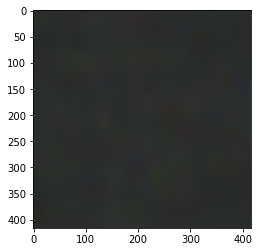

In [68]:
FILTER_INDEX=1
activations =  activation_maximization(CategoricalScore(1),
                           steps=200,
                           input_modifiers=[Jitter(jitter=8), Rotate2D(degree=1)
                                                                                   
                                           ],
                           regularizers=[TotalVariation2D(weight=1.0),
                                         Norm(weight=0.3, p=1)],
                           optimizer=tf.keras.optimizers.RMSprop(1.0, 0.999),
                           callbacks=[Progress()])
plt.imshow(activations[0])

SyntaxError: invalid syntax (492201176.py, line 1)

In [40]:
x=
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [10]:
def layer_extractor(arg_model, arg_layer_name):
    target_layer=arg_model.getlayer(arg_layer_name)
    new_model=tf.keras.Model(inputs=arg_model.inputs,outputs=arg_layer_name.output)
    new_model.layers[-1].activation=tf.keras.activations.linear
    return new_model
    

In [13]:
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model=y3, model_modifier=layer_extractor(arg_layer_name='conv2d'), clone=True)

TypeError: layer_extractor() missing 1 required positional argument: 'arg_model'